In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
%matplotlib inline

data=pd.read_csv('/home/iv.kem/Downloads/archive/TravelInsurancePrediction.csv', index_col = "Index")

data

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
Index,,,,,,,,,
0,31,Government Sector,Yes,400000,6,1,No,No,0
1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0
...,...,...,...,...,...,...,...,...,...
1982,33,Private Sector/Self Employed,Yes,1500000,4,0,Yes,Yes,1
1983,28,Private Sector/Self Employed,Yes,1750000,5,1,No,Yes,0
1984,28,Private Sector/Self Employed,Yes,1150000,6,1,No,No,0


#### №1 Сколько в наборе данных объектов и признаков? Дать описание каждому признаку, если оно есть. 

In [3]:
data.shape

(1987, 9)

Всего в наборе 1987 объектов и 9 признака.

Age- Возраст учащегося.
Employment Type - Тип занятости.
GraduateOrNot - Выпускник Или Нет.
AnnualIncome - Годовой доход.
FamilyMembers - Члены семьи.
ChronicDiseases - Хронические Заболевания.
FrequentFlyer - Часто летающий пассажир.
EverTravelledAbroad - Когда-либо путешествовал за границу.
TravelInsurance - Страхование путешествий.

#### №2  Сколько категориальных признаков, какие?

В данном наборе данных 4 категориальных признака.
К категориальным признакам относятся: 
Employment Type - Тип занятости.
GraduateOrNot - Выпускник Или Нет.
FrequentFlyer - Часто летающий пассажир.
EverTravelledAbroad - Когда-либо путешествовал за границу.

In [4]:
data_nominal=data.loc[:,data.columns.isin(['Employment Type','GraduateOrNot','FrequentFlyer','EverTravelledAbroad'])]
data_nominal

,Employment Type,GraduateOrNot,FrequentFlyer,EverTravelledAbroad
Index,,,,
0,Government Sector,Yes,No,No
1,Private Sector/Self Employed,Yes,No,No
2,Private Sector/Self Employed,Yes,No,No
3,Private Sector/Self Employed,Yes,No,No
4,Private Sector/Self Employed,Yes,Yes,No
...,...,...,...,...
1982,Private Sector/Self Employed,Yes,Yes,Yes
1983,Private Sector/Self Employed,Yes,No,Yes
1984,Private Sector/Self Employed,Yes,No,No


#### №3 Столбец с максимальным количеством уникальных значений категориального признака?

In [5]:
print(data['Employment Type'].value_counts())
print(data['GraduateOrNot'].value_counts())
print(data['FrequentFlyer'].value_counts())
print(data['EverTravelledAbroad'].value_counts())

Private Sector/Self Employed    1417
Government Sector                570
Name: Employment Type, dtype: int64
Yes    1692
No      295
Name: GraduateOrNot, dtype: int64
No     1570
Yes     417
Name: FrequentFlyer, dtype: int64
No     1607
Yes     380
Name: EverTravelledAbroad, dtype: int64


Все эти 4 столбца имеют максимальное количество уникальных значений.

#### №4 Есть ли бинарные признаки?

Да, к таким признакам относятся: 
Employment Type- Тип занятости.
GraduateOrNot - Выпускник Или Нет.
FrequentFlyer - Часто летающий пассажир.
EverTravelledAbroad - Когда-либо путешествовал за границу.
ChronicDiseases - Хронические Заболевания.
TravelInsurance - Страхование путешествий.

In [6]:
data_binary=data.loc[:,data.columns.isin(['Employment Type','GraduateOrNot','ChronicDiseases' , 'FrequentFlyer' , 'EverTravelledAbroad','TravelInsurance'])]
data_binary

,Employment Type,GraduateOrNot,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
Index,,,,,,
0,Government Sector,Yes,1,No,No,0
1,Private Sector/Self Employed,Yes,0,No,No,0
2,Private Sector/Self Employed,Yes,1,No,No,1
3,Private Sector/Self Employed,Yes,1,No,No,0
4,Private Sector/Self Employed,Yes,1,Yes,No,0
...,...,...,...,...,...,...
1982,Private Sector/Self Employed,Yes,0,Yes,Yes,1
1983,Private Sector/Self Employed,Yes,1,No,Yes,0
1984,Private Sector/Self Employed,Yes,1,No,No,0


#### №5 Какие числовые признаки?

К числовым признакам относятся: 
Age - Возраст учащегося. 
AnnualIncome - Годовой доход.
FamilyMembers - Члены семьи.


In [7]:
data_numeric=data.loc[:,data.columns.isin(['Age','AnnualIncome','FamilyMembers'])]
data_numeric

,Age,AnnualIncome,FamilyMembers
Index,,,
0,31,400000,6
1,31,1250000,7
2,34,500000,4
3,28,700000,3
4,28,700000,8
...,...,...,...
1982,33,1500000,4
1983,28,1750000,5
1984,28,1150000,6


#### №6 Есть ли пропуски?

In [8]:
data.isna().sum()

Age                    0
Employment Type        0
GraduateOrNot          0
AnnualIncome           0
FamilyMembers          0
ChronicDiseases        0
FrequentFlyer          0
EverTravelledAbroad    0
TravelInsurance        0
dtype: int64

Пропусков нет.

#### №7 Сколько объектов с пропусками?

In [9]:
print(sum(data.isnull().sum(axis=1)))

0


0

#### №8 Столбец с максимальным количеством пропусков? 
<br>
Такого столбца нет, так как пропусков в наборе данных нет.

#### №9 Есть ли на ваш взгляд выбросы? Аномальные значения?

In [10]:
data.describe()

,Age,AnnualIncome,FamilyMembers,ChronicDiseases,TravelInsurance
count,1987.000000,1.987000e+03,1987.000000,1987.000000,1987.000000
mean,29.650226,9.327630e+05,4.752894,0.277806,0.357323
std,2.913308,3.768557e+05,1.609650,0.448030,0.479332
min,25.000000,3.000000e+05,2.000000,0.000000,0.000000
25%,28.000000,6.000000e+05,4.000000,0.000000,0.000000
50%,29.000000,9.000000e+05,5.000000,0.000000,0.000000
75%,32.000000,1.250000e+06,6.000000,1.000000,1.000000
max,35.000000,1.800000e+06,9.000000,1.000000,1.000000


Здесь нет сильных различий между максимальными значениями и средними, потому можно сделать вывод что вбросов/аномалий в данных нет



#### №10  Столбец с максимальным средним значением после нормировки признаков через стандартное отклонение?


В ходе нормализации будем нормализовывать числовые признаки, но которые принимают реальные вещественные значения, а не являются описанием какого-либо признака.
К таким признакам относятся: 
Age
AnnualIncome


In [11]:
scale_features_std = StandardScaler() 
features_std = scale_features_std.fit_transform(data[['Age']]) 
data['Age_std']=features_std
features_std=scale_features_std.fit_transform(data[['AnnualIncome']])
data['AnnualIncome_std']=features_std


data_std=data.loc[:,data.columns.isin(['Age_std','AnnualIncome_std'])]
data_std.describe()


,Age_std,AnnualIncome_std
count,1.987000e+03,1.987000e+03
mean,-5.616488e-16,1.477317e-16
std,1.000252e+00,1.000252e+00
min,-1.596603e+00,-1.679482e+00
25%,-5.665868e-01,-8.832207e-01
50%,-2.232480e-01,-8.695957e-02
75%,8.067684e-01,8.420117e-01
max,1.836785e+00,2.301824e+00


Столбец с максимальным средним значением после нормализации с помощью стандартного отклонения - $AnnualIncome_std$

#### №11  Столбец с целевым признаком?
В наборе данных можно выделить один целевой признак: TravelInsurance - Страхование путешествий.


In [12]:
target=data['TravelInsurance']

data['TravelInsurance'].to_numpy()

print(target)


Index
0       0
1       0
2       1
3       0
4       0
       ..
1982    1
1983    0
1984    0
1985    1
1986    0
Name: TravelInsurance, Length: 1987, dtype: int64


#### №12 Сколько параметров попадает в тренировочную выборку при параметрах: test_size=0.3, random_state=42?

Выделяем подмножество параметров, удаляем из изначального набора данных параметр $TravelInsurance$ . Но для начала сделаем предобработку категориальных признаков, а также бинарных, которые в столбцах содержат строчные типы данных.

Предобработка категориальных признаков.

In [13]:
data.rename(columns = {'Employment Type':'Employment_Type'},inplace=True)

label = LabelEncoder()
label.fit(data.Employment_Type)
data.Employment_Type= label.transform(data.Employment_Type)

label = LabelEncoder()
label.fit(data.GraduateOrNot)
data.GraduateOrNot = label.transform(data.GraduateOrNot)

label = LabelEncoder()
label.fit(data.FrequentFlyer)
data.FrequentFlyer = label.transform(data.FrequentFlyer)

label = LabelEncoder()
label.fit(data.EverTravelledAbroad)
data.EverTravelledAbroad = label.transform(data.EverTravelledAbroad)

data_nominal=data.loc[:,data.columns.isin(['Employment_Type','GraduateOrNot','FrequentFlyer','EverTravelledAbroad'])]
data_nominal

,Employment_Type,GraduateOrNot,FrequentFlyer,EverTravelledAbroad
Index,,,,
0,0,1,0,0
1,1,1,0,0
2,1,1,0,0
3,1,1,0,0
4,1,1,1,0
...,...,...,...,...
1982,1,1,1,1
1983,1,1,0,1
1984,1,1,0,0


In [14]:
data

,Age,Employment_Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance,Age_std,AnnualIncome_std
Index,,,,,,,,,,,
0,31,0,1,400000,6,1,0,0,0,0.463430,-1.414061
1,31,1,1,1250000,7,0,0,0,0,0.463430,0.842012
2,34,1,1,500000,4,1,0,0,1,1.493446,-1.148641
3,28,1,1,700000,3,1,0,0,0,-0.566587,-0.617800
4,28,1,1,700000,8,1,1,0,0,-0.566587,-0.617800
...,...,...,...,...,...,...,...,...,...,...,...
1982,33,1,1,1500000,4,0,1,1,1,1.150107,1.505563
1983,28,1,1,1750000,5,1,0,1,0,-0.566587,2.169114
1984,28,1,1,1150000,6,1,0,0,0,-0.566587,0.576591


In [15]:
one_hot = pd.get_dummies(data['FamilyMembers'],prefix='FamMem')
# Drop column B as it is now encoded
data = data.drop('FamilyMembers',axis = 1)
# Join the encoded df
data = data.join(one_hot)
data

,Age,Employment_Type,GraduateOrNot,AnnualIncome,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance,Age_std,AnnualIncome_std,FamMem_2,FamMem_3,FamMem_4,FamMem_5,FamMem_6,FamMem_7,FamMem_8,FamMem_9
Index,,,,,,,,,,,,,,,,,,
0,31,0,1,400000,1,0,0,0,0.463430,-1.414061,0,0,0,0,1,0,0,0
1,31,1,1,1250000,0,0,0,0,0.463430,0.842012,0,0,0,0,0,1,0,0
2,34,1,1,500000,1,0,0,1,1.493446,-1.148641,0,0,1,0,0,0,0,0
3,28,1,1,700000,1,0,0,0,-0.566587,-0.617800,0,1,0,0,0,0,0,0
4,28,1,1,700000,1,1,0,0,-0.566587,-0.617800,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1982,33,1,1,1500000,0,1,1,1,1.150107,1.505563,0,0,1,0,0,0,0,0
1983,28,1,1,1750000,1,0,1,0,-0.566587,2.169114,0,0,0,1,0,0,0,0
1984,28,1,1,1150000,1,0,0,0,-0.566587,0.576591,0,0,0,0,1,0,0,0


In [17]:
parameters=data.loc[:,data.columns.isin(['Age_std','AnnualIncome_std','Employment_Type','GraduateOrNot','ChronicDiseases','FrequentFlyer','EverTravelledAbroad','TravelInsurance','FamMem_2','FamMem_3','FamMem_4','FamMem_5','FamMem_6','FamMem_7','FamMem_8','FamMem_9'])]
parameters

,Employment_Type,GraduateOrNot,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance,Age_std,AnnualIncome_std,FamMem_2,FamMem_3,FamMem_4,FamMem_5,FamMem_6,FamMem_7,FamMem_8,FamMem_9
Index,,,,,,,,,,,,,,,,
0,0,1,1,0,0,0,0.463430,-1.414061,0,0,0,0,1,0,0,0
1,1,1,0,0,0,0,0.463430,0.842012,0,0,0,0,0,1,0,0
2,1,1,1,0,0,1,1.493446,-1.148641,0,0,1,0,0,0,0,0
3,1,1,1,0,0,0,-0.566587,-0.617800,0,1,0,0,0,0,0,0
4,1,1,1,1,0,0,-0.566587,-0.617800,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1982,1,1,0,1,1,1,1.150107,1.505563,0,0,1,0,0,0,0,0
1983,1,1,1,0,1,0,-0.566587,2.169114,0,0,0,1,0,0,0,0
1984,1,1,1,0,0,0,-0.566587,0.576591,0,0,0,0,1,0,0,0


Выделение тренировочной и тестовой выборок.

In [18]:
x_train, x_test, y_train, y_test=train_test_split(parameters,target,test_size=0.3,random_state=42)
print(y_test.shape)
print(x_test.shape)

(597,)
(597, 16)


При заданных параметрах в тренировочную выборку попадает 597 объектов.

#### № 13 Между какими признаками наблюдается линейная зависимость (корреляция)?


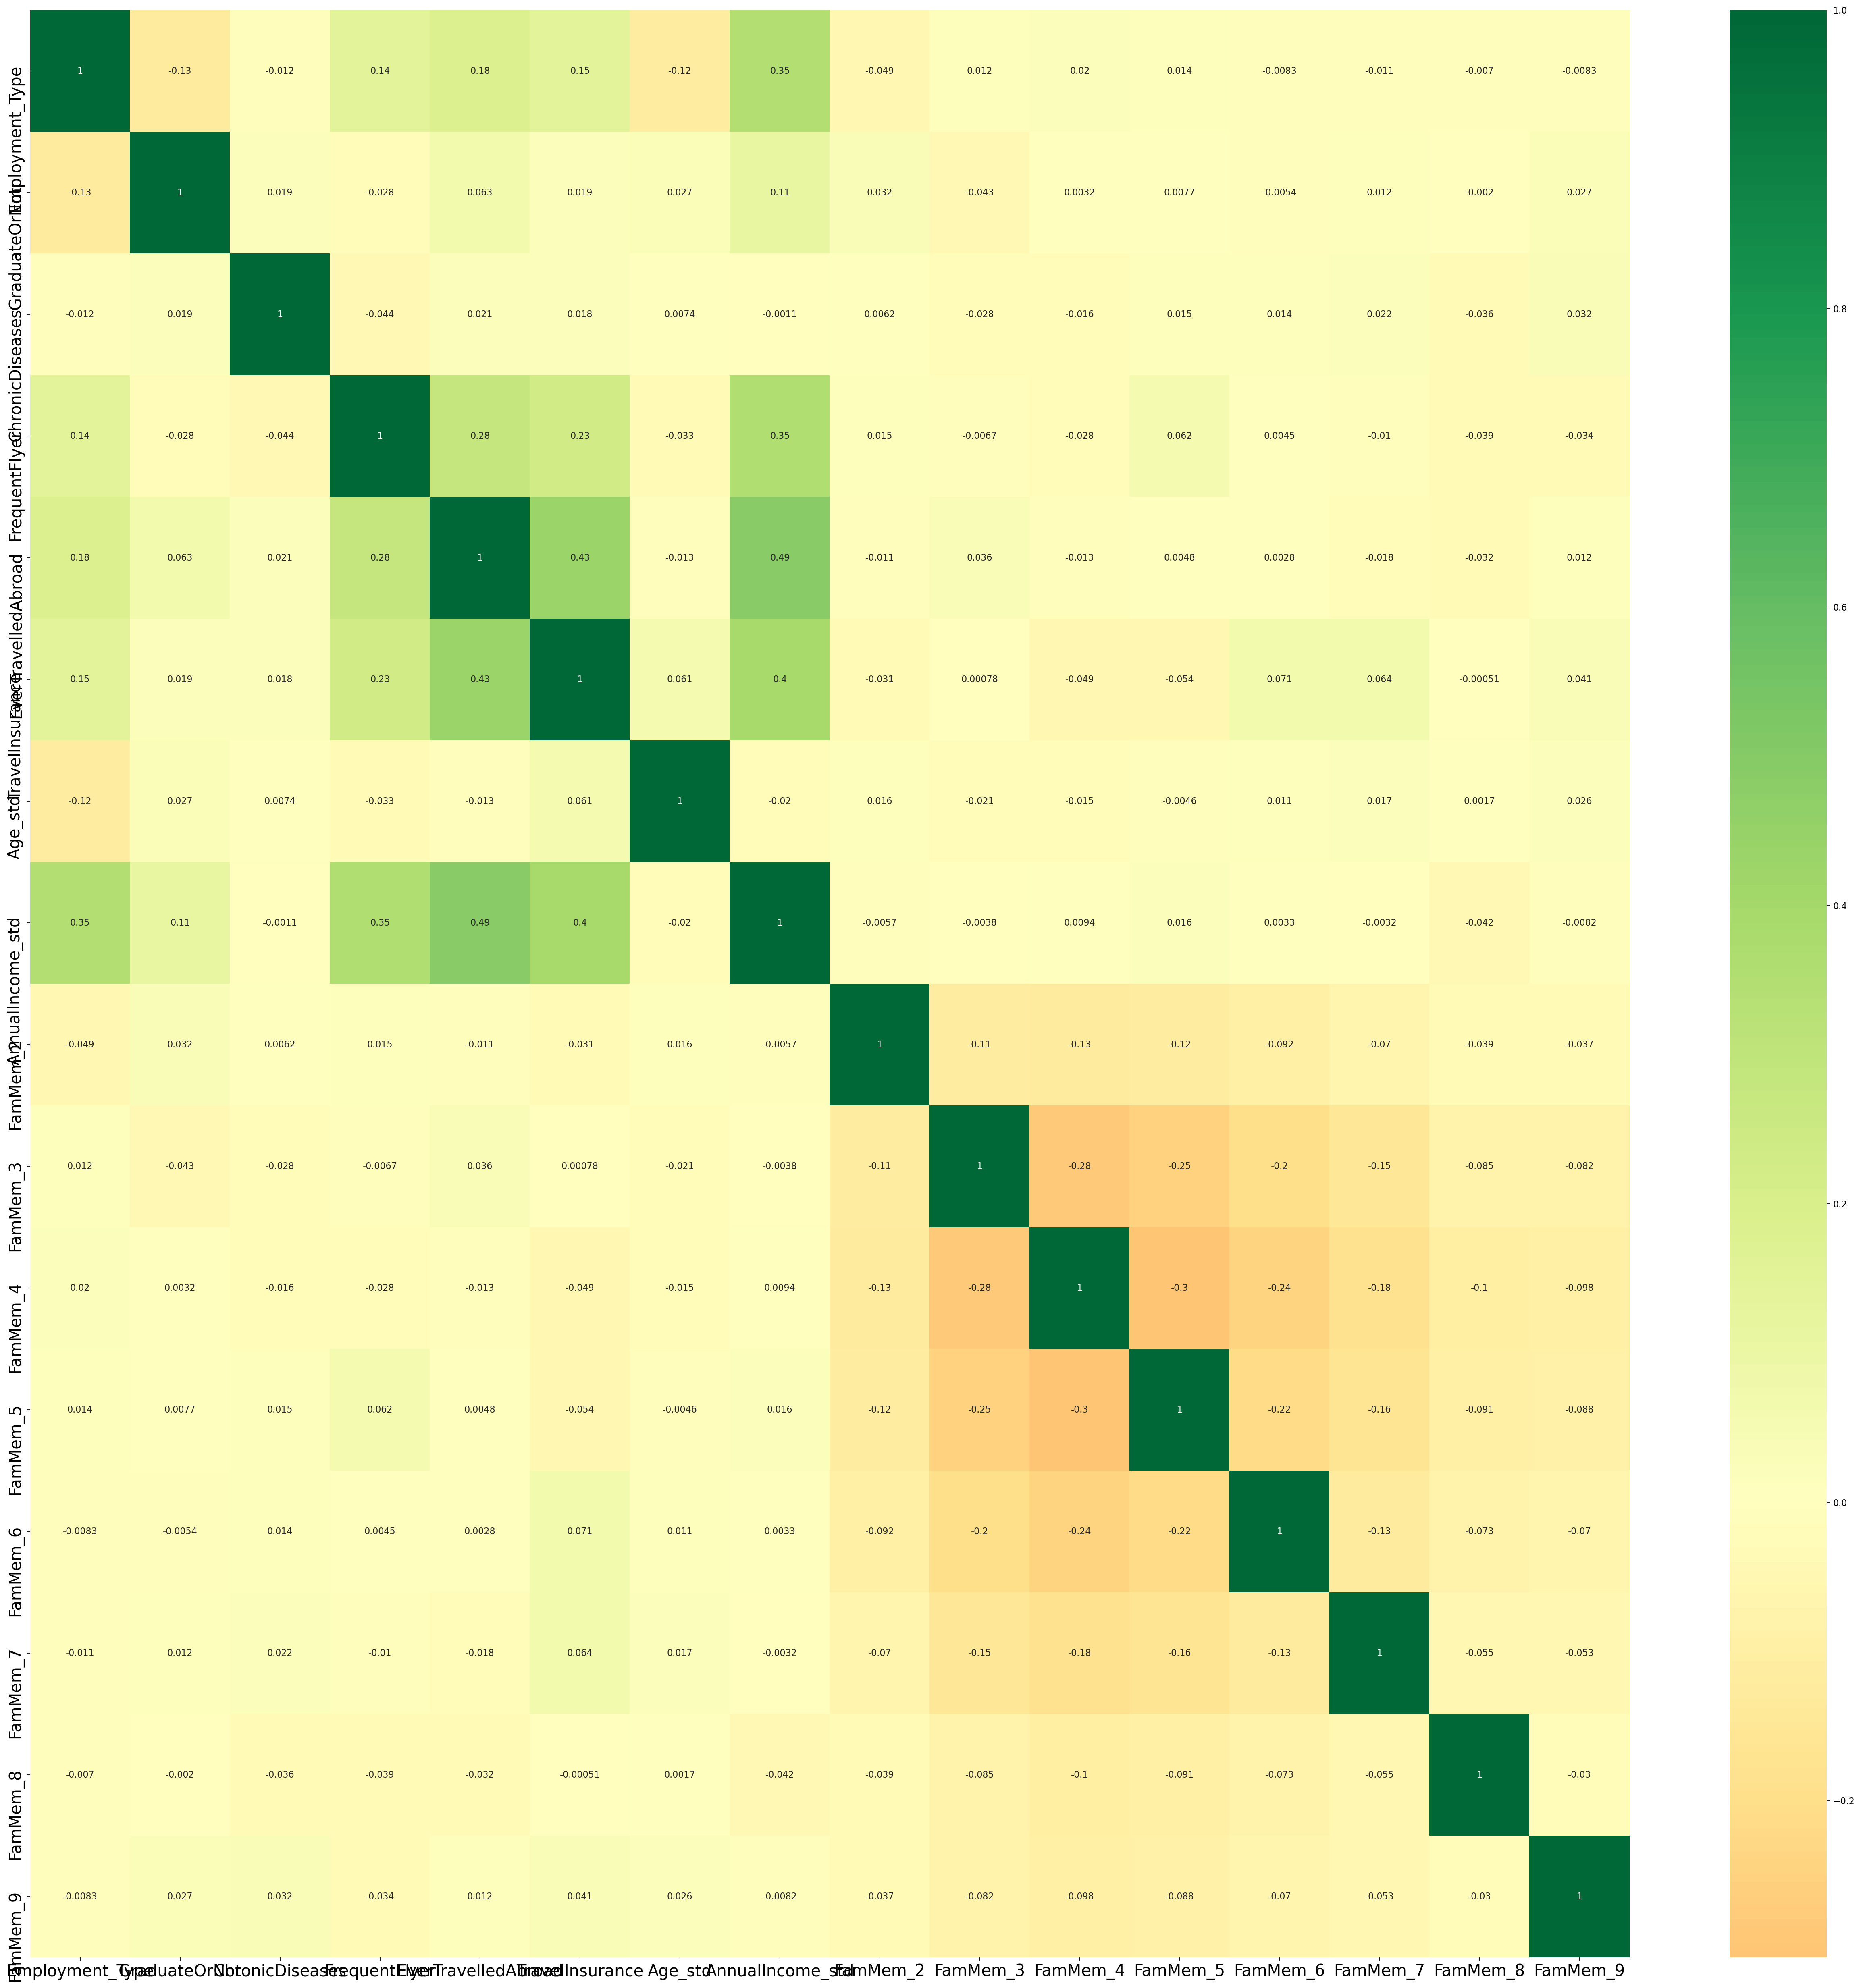

In [19]:
plt.figure(figsize=(40,40), dpi= 160)
sns.heatmap(parameters.corr(), xticklabels=parameters.corr().columns, yticklabels=parameters.corr().columns, cmap='RdYlGn', center=0, annot=True)

plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.show()

Из таблицы можно сделать вывод, что в этом датасете нет линейно-зависимых параметров.

#### № 14  Сколько признаков достаточно для объяснения 90% дисперсии после применения метода PCA?

In [20]:
pca = PCA()
pca.fit(x_train)
x_pca = pca.transform(x_train)

In [27]:
for i, component in enumerate(pca.components_):
 print("{} component: {}% of initial variance".format(i + 1, round(100 * pca.explained_variance_ratio_[i], 2)))
 print(" + ".join("%.3f x %s" % (value, name) for value, name in zip(component,parameters.columns)))

1 component: 29.48% of initial variance
0.174 x Employment_Type + 0.028 x GraduateOrNot + 0.000 x ChronicDiseases + 0.158 x FrequentFlyer + 0.205 x EverTravelledAbroad + 0.216 x TravelInsurance + -0.237 x Age_std + 0.894 x AnnualIncome_std + 0.001 x FamMem_2 + 0.002 x FamMem_3 + -0.007 x FamMem_4 + 0.015 x FamMem_5 + 0.007 x FamMem_6 + -0.009 x FamMem_7 + -0.006 x FamMem_8 + -0.003 x FamMem_9
2 component: 25.78% of initial variance
-0.032 x Employment_Type + 0.025 x GraduateOrNot + -0.003 x ChronicDiseases + 0.031 x FrequentFlyer + 0.042 x EverTravelledAbroad + 0.089 x TravelInsurance + 0.968 x Age_std + 0.226 x AnnualIncome_std + 0.007 x FamMem_2 + -0.022 x FamMem_3 + -0.002 x FamMem_4 + 0.004 x FamMem_5 + 0.015 x FamMem_6 + -0.003 x FamMem_7 + -0.003 x FamMem_8 + 0.004 x FamMem_9
3 component: 6.06% of initial variance
0.108 x Employment_Type + -0.022 x GraduateOrNot + -0.038 x ChronicDiseases + -0.125 x FrequentFlyer + -0.074 x EverTravelledAbroad + -0.131 x TravelInsurance + 0.009 x

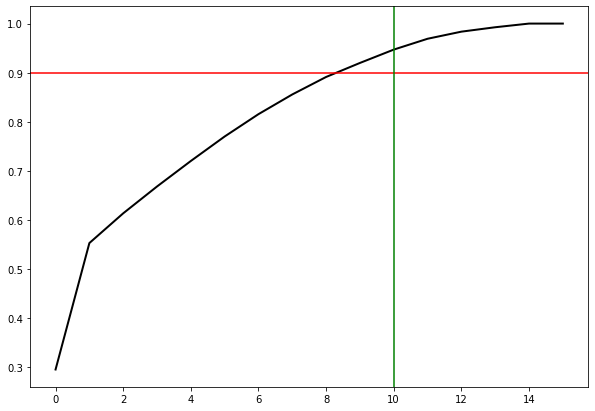

In [24]:
plt.figure(figsize=(10,7))
plt.plot(np.cumsum(pca.explained_variance_ratio_), color='k', lw=2)
plt.axhline(0.9, c='r')
plt.axvline(10, c='g')

Для объяснения 90% дисперсии после применения метода PCA достаточно 10 компонент.

#### № 15 Какой признак вносит наибольший вклад в первую компоненту?

1 component: 29.48% of initial variance
0.174 x Employment_Type + 0.028 x GraduateOrNot + 0.000 x ChronicDiseases + 0.158 x FrequentFlyer + 0.205 x EverTravelledAbroad + 0.216 x TravelInsurance + -0.237 x Age_std + 0.894 x AnnualIncome_std + 0.001 x FamMem_2 + 0.002 x FamMem_3 + -0.007 x FamMem_4 + 0.015 x FamMem_5 + 0.007 x FamMem_6 + -0.009 x FamMem_7 + -0.006 x FamMem_8 + -0.003 x FamMem_9

Признак $AnnualIncome_std$ вносит наибольший вклад в первую компоненту.

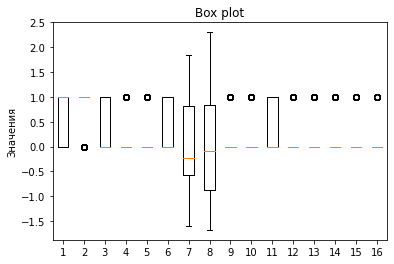

In [28]:
import matplotlib.pyplot as pltz

fig, ax = plt.subplots()
ax.boxplot(parameters)

ax.set_title('Box plot')
ax.set_ylabel('Значения')
plt.show()

#### № 16  Построить двухмерное представление данных с помощью алгоритма t-SNE. На сколько кластеров визуально, на ваш взгляд, разделяется выборка? Объяснить смысл кластеров.

[[ 23.742363     0.19087806]
 [-19.993422   -16.011976  ]
 [ 25.58573     35.545776  ]
 ...
 [ -7.8768253   10.66755   ]
 [  1.3286464   35.985943  ]
 [ 27.694685    33.40452   ]]


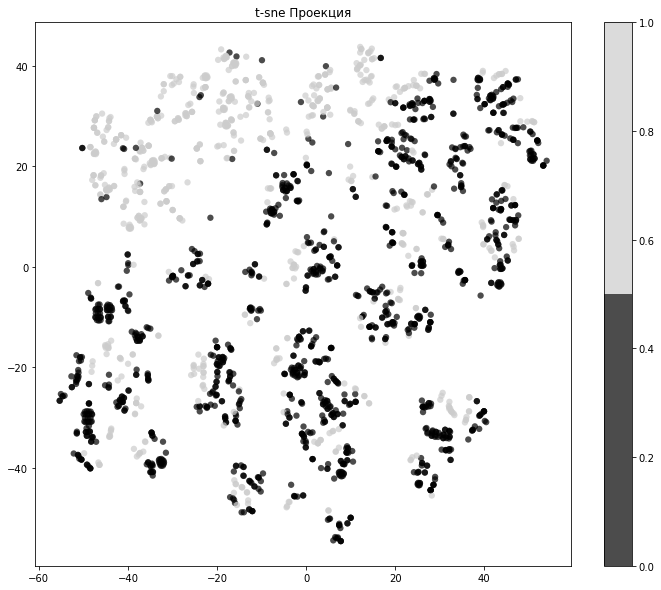

In [29]:
from sklearn.manifold import TSNE
tnse=TSNE(random_state=47)
X_tsne=tnse.fit_transform(parameters)

plt.figure(figsize=(12,10))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=target,edgecolor='none',alpha=0.7,s=40,
            cmap=plt.cm.get_cmap('nipy_spectral',2))
plt.colorbar()
plt.title('t-sne Проекция')
print(X_tsne)


Выборка раделяется на 2 класса, верхний кластер показывает что объекты покупают страховку, а объекты нижнего кластера - не покупают.

# Кластеризация

In [3]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
data = pd.read_csv('/home/iv.kem/Downloads/archive/TravelInsurancePrediction.csv', index_col = "Index")

In [4]:
scaler0 = StandardScaler()
data[['Employment Type', 'GraduateOrNot', 'FrequentFlyer', 'EverTravelledAbroad']] = pd.get_dummies(data[['Employment Type', 'GraduateOrNot', 'FrequentFlyer', 'EverTravelledAbroad']], drop_first=True, dtype = int)
data[['Age', 'AnnualIncome']] = pd.DataFrame(scaler0.fit_transform(data[['Age', 'AnnualIncome']]), columns = data[['Age', 'AnnualIncome']].columns)
one_hot = pd.get_dummies(data['FamilyMembers'],prefix='FamMem')

# Drop column B as it is now encoded
data = data.drop('FamilyMembers',axis = 1)
# Join the encoded df
data = data.join(one_hot)
data


,Age,Employment Type,GraduateOrNot,AnnualIncome,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance,FamMem_2,FamMem_3,FamMem_4,FamMem_5,FamMem_6,FamMem_7,FamMem_8,FamMem_9
Index,,,,,,,,,,,,,,,,
0,0.463430,0,1,-1.414061,1,0,0,0,0,0,0,0,1,0,0,0
1,0.463430,1,1,0.842012,0,0,0,0,0,0,0,0,0,1,0,0
2,1.493446,1,1,-1.148641,1,0,0,1,0,0,1,0,0,0,0,0
3,-0.566587,1,1,-0.617800,1,0,0,0,0,1,0,0,0,0,0,0
4,-0.566587,1,1,-0.617800,1,1,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1982,1.150107,1,1,1.505563,0,1,1,1,0,0,1,0,0,0,0,0
1983,-0.566587,1,1,2.169114,1,0,1,0,0,0,0,1,0,0,0,0
1984,-0.566587,1,1,0.576591,1,0,0,0,0,0,0,0,1,0,0,0


In [5]:
for i in range(data.shape[1] + 1): 
    pca2 = PCA(n_components = i)
    pca2.fit(data)
    print(i, sum(pca2.explained_variance_ratio_))

0 0
1 0.2946685454547365
2 0.5512037031475744
3 0.6128567194403431
4 0.6678911979811859
5 0.72047436600542
6 0.7692441385686425
7 0.8163054165726855
8 0.8569887792070419
9 0.8919322654832454
10 0.9202943430778456
11 0.9468084073916277
12 0.9700359054620749
13 0.9839631105350368
14 0.9927298273367878
15 0.9999999999999998
16 0.9999999999999998


Для описания 90% дисперсии достаточно 10 компонент

#AgglomerativeClustering (Иерархической кластеризация)

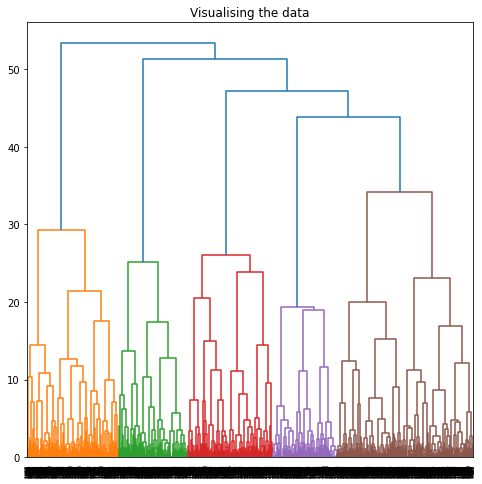

In [6]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as shc
#снизим размерность данных при помощи метода главных компонент
pca = PCA(n_components=6).fit(data)
pdata = pca.transform(data)

#нормализуем данные
scaler = StandardScaler()
data2 = scaler.fit_transform(pdata)
plt.figure(figsize =(8, 8))
plt.title('Visualising the data')
Dendrogram = shc.dendrogram((shc.linkage(data2, method ='ward')))

Пробуем отрисовать кластеры

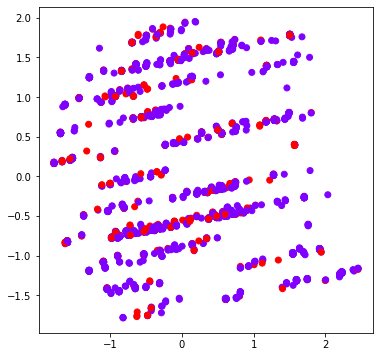

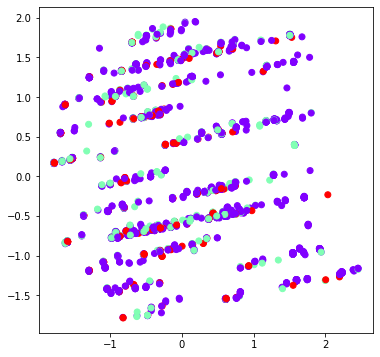

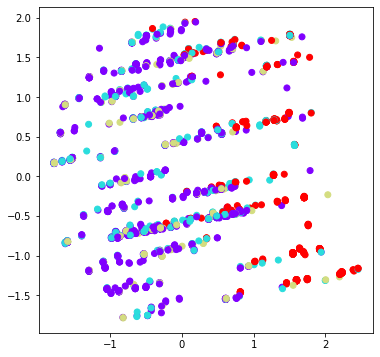

In [8]:
for i in range(2,5):
    ac3 = AgglomerativeClustering(n_clusters = i, linkage='ward')

    plt.figure(figsize =(6, 6))
    plt.scatter(data2[:,0], data2[:,1],
               c = ac3.fit_predict(data2), cmap ='rainbow')
    print(data['Tra'])
    plt.show()

Можно сделать что чем больше кластеров давать алгоритму, тем менее разделимы они получаются на наших данных

# DBSCAN

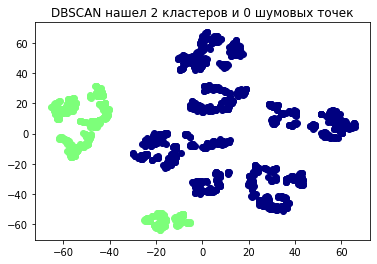

In [48]:
from sklearn.cluster import DBSCAN

#снизим размерность данных при помощи метода главных компонент
pca = PCA(n_components=6).fit(data)
pdata = pca.transform(data)

#нормализуем данные
scaler = StandardScaler()
data2 = scaler.fit_transform(pdata)

#используем dbscan для обнаружения кластеров
dbscan = DBSCAN(eps = 1.65, min_samples=5)
dbscan.fit(data2)
labels = dbscan.labels_

#используем tsne для снижения размерности
tsne = TSNE()
pca_2d = tsne.fit_transform(data2)

#визуализируем кластеры
for label in set(labels):
    if label == -1:
        plt.scatter(pca_2d[labels == label, 0], pca_2d[labels == label, 1], color='blue')
    else:
        plt.scatter(pca_2d[labels == label, 0], pca_2d[labels == label, 1], color=plt.cm.jet(label / np.max(labels + 1)))

plt.title('DBSCAN нашел {} кластеров и {} шумовых точек'.format(len(set(labels)) - (1 if -1 in labels else 0), np.sum(labels == -1)))
plt.show()

# K-means

In [49]:
pca = PCA(n_components=6).fit(data)
pdata = pca.transform(data)
scaler = StandardScaler()
data2 = scaler.fit_transform(pdata)


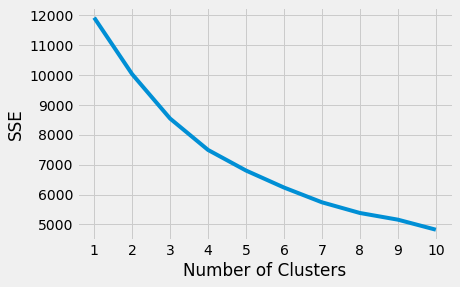

In [50]:
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(data2)
    sse.append(kmeans.inertia_)
    
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

Из граффика видно что оптимальное кол-во кластеров - 4

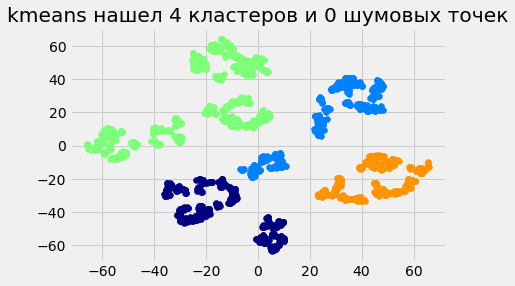

In [51]:
kmeans = KMeans(n_clusters=4, random_state = 157)
kmeans.fit(data2)
labels = kmeans.labels_

tsne = TSNE()
pca_2d = tsne.fit_transform(data2)

for label in set(labels):
    if label == -1:
        plt.scatter(pca_2d[labels == label, 0], pca_2d[labels == label, 1], color='blue')
    else:
        plt.scatter(pca_2d[labels == label, 0], pca_2d[labels == label, 1], color=plt.cm.jet(label / np.max(labels + 1)))

plt.title('kmeans нашел {} кластеров и {} шумовых точек'.format(len(set(labels)) - (1 if -1 in labels else 0), np.sum(labels == -1)))
plt.show()

In [52]:

label = kmeans.fit_predict(data2)

silhouette_avg = silhouette_score(data2,label)
#print(silhouette_avg)
print(kmeans.cluster_centers_)

[[-0.02338718  0.01653908  0.12747969 -0.38446642  1.40057273  0.80884714]
 [ 0.03223941 -0.00598203 -0.97650456  1.29426444  0.19268617 -0.70149935]
 [-0.00717411  0.00362513 -0.33309664 -0.52959815 -0.73477452  0.18495898]
 [ 0.00469648 -0.01965695  1.65835384  0.04514494 -0.32784704 -0.50751104]]


In [54]:
original = scaler.inverse_transform(kmeans.cluster_centers_)
original_pca = pca.inverse_transform(original)
centr = pd.DataFrame(original_pca, columns=data.columns)
res2 = pd.DataFrame(scaler0.inverse_transform(centr[['Age', 'AnnualIncome',]]), 
                    columns = ['Age', 'AnnualIncome'])

print(centr)

        Age  Employment Type  GraduateOrNot  AnnualIncome  ChronicDiseases  \
0  0.007864         0.629113       0.912942     -0.001067         0.972436   
1 -0.011303         0.685189       0.889088      0.055563         0.271174   
2  0.006592         0.756882       0.796469     -0.043795         0.030614   
3 -0.009633         0.752306       0.850673      0.027383        -0.008222   

   FrequentFlyer  EverTravelledAbroad  TravelInsurance  FamMem_2  FamMem_3  \
0       0.071783             0.210861         0.403489  0.052937  0.236327   
1       0.309669             0.158524         0.233949  0.050433 -0.110043   
2       0.239356             0.219074         0.437767  0.047907  0.458790   
3       0.193985             0.149017         0.280502  0.033298 -0.072420   

   FamMem_4  FamMem_5  FamMem_6  FamMem_7  FamMem_8  FamMem_9  
0  0.316191  0.017050  0.197313  0.117420  0.021395  0.041367  
1 -0.077586  0.891660  0.115490  0.078440  0.027740  0.023867  
2  0.064806  0.078950  0.1

Кластеры:

1. Люди среднего возраста, которые работают в частном секторе, учились в колледже, имеют чуть ниже среднего заработок, количество детей - среднее. У них есть хроническое заболевание. Покупают авиаилеты и путешествуют за рубеж редко, кто-то покупал страховой пакет, а кто-то нет
 
2.  Люди среднего возраста, которые работают в частном секторе, учились в колледже, имеют средний заработок , количество детей - среднее. У них нет болезней. Покупают авиаилеты и путешествуют за рубеж редко, не покупают страховой пакет.

3. Люди немного старше среднего, которые работают в государственном секторе, учились в колледже, имеют заработок ниже среднего, количество детей - среднее. У них нет болезней. Покупают авиаилеты и путешествуют за рубеж редко, большинство не купило страховой пакет.

4. Люди среднего возраста, которые работают в частном секторе, учились в колледже, имеют заработок выще среднего, количество детей - среднее. У них нет болезней. Покупают авиаилеты и путешествуют за рубеж чаще обычного ( больше половины да чем нет), почти все купили страховой пакет.

# Классификация на основе кластеров лучшего алгоритма (K-means)

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

data['cluster'] = labels

cluster_0 = data[data['cluster'] == 0]
cluster_1 = data[data['cluster'] == 1]
cluster_2 = data[data['cluster'] == 2]
cluster_3 = data[data['cluster'] == 3]

data_sel = cluster_0

TravelInsurance = data_sel.loc[:, data_sel.columns.isin(['TravelInsurance'])]
data_sel = data_sel.drop('TravelInsurance', axis = 1).drop('cluster', axis = 1)

x_train, x_test, y_train, y_test = train_test_split(data_sel, TravelInsurance, test_size= 0.3, random_state=4477)

for i in range(1, 10):
    T = DecisionTreeClassifier(random_state=338, max_depth = i)
    T = T.fit(x_train, y_train)
    print(str(i) + ": " + str(T.score(x_test, y_test)))

1: 0.7364341085271318
2: 0.7674418604651163
3: 0.7751937984496124
4: 0.7906976744186046
5: 0.7984496124031008
6: 0.7984496124031008
7: 0.8062015503875969
8: 0.7829457364341085
9: 0.7441860465116279


Лучший результат дает дерево с глубиной 4

In [56]:
T = DecisionTreeClassifier(random_state=338, max_depth = 4)
T = T.fit(x_train, y_train)

pred = T.predict(x_test)
report = classification_report(y_test, pred)
print(report, T.score(x_test, y_test))


              precision    recall  f1-score   support

           0       0.76      0.95      0.85        78
           1       0.88      0.55      0.67        51

    accuracy                           0.79       129
   macro avg       0.82      0.75      0.76       129
weighted avg       0.81      0.79      0.78       129
 0.7906976744186046


Получили модель с правильностью порядка 76% по метрике f1

In [57]:
importances = T.feature_importances_
print(importances)

[0.1382899  0.02543763 0.00905349 0.54925611 0.         0.01466946
 0.06357554 0.         0.         0.         0.         0.08450275
 0.11521512 0.         0.        ]


Самым важным признаком оказался - Annuallncome

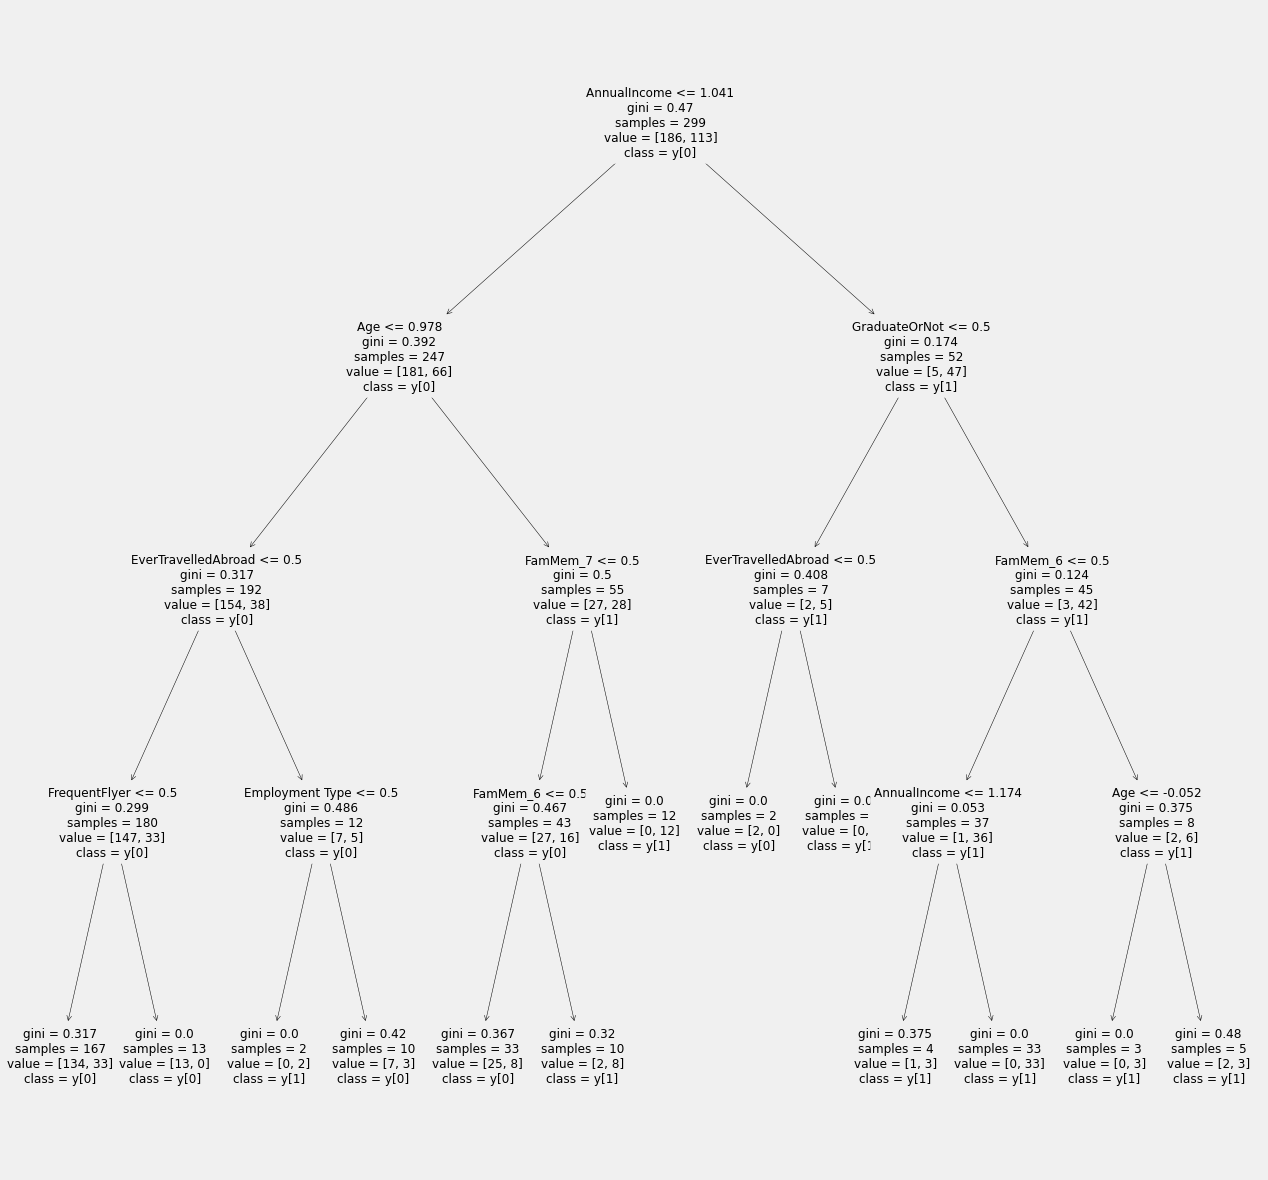

In [58]:
plt.figure(figsize=(20,20))
tree.plot_tree(T,max_depth=4,fontsize=12,class_names=True,feature_names=x_test.columns)
plt.show()

Опишем характеристики некоторых объектов класса 1.  AnnualIncome >= 1.041,  GraduateOrNot >= 0.5,  Age в окрестности -0.052, EverTravelledAdroab >= 0.5.

Опишем характеристики некоторых объектов класса 0.  AnnualIncome <= 1.041, Age<=0.978 or Age >=0.978,
EverTravelledAdroab <= 0.5, FamMem_6 <= 0.5.


Попробуем RandomForestClassifier + GridSearch

In [59]:

RF = RandomForestClassifier()
grid_parametrs = {
      'n_estimators':[20,50,100, 150, 200,250,300,350,400,450,500],
      'max_depth':[1,3,5,9,10,12,15,17]
}

grid = GridSearchCV(RF,param_grid=grid_parametrs,cv=3,scoring='f1')
model_grid = grid.fit(x_train, y_train.values.ravel())

print('Лучшие гиперпараметры:' + str(model_grid.best_params_))
print('Best score is: ' + str(model_grid.best_score_))



Лучшие гиперпараметры:{'max_depth': 9, 'n_estimators': 250}
Best score is: 0.7005622871624296


In [60]:
grid_parametrs = {
      'n_estimators':[200,210,220,230,240,250,260,270,280,290,300],
      'max_depth':[9]
}

grid = GridSearchCV(RF,param_grid=grid_parametrs,cv=3,scoring='f1')
model_grid = grid.fit(x_train,y_train.values.ravel())

print('Лучшие гиперпараметры:' + str(model_grid.best_params_))
pred=grid.predict(x_test)

report = classification_report(y_test.values.ravel(), pred)
print(report)
F1_score = f1_score(y_test.values.ravel(), pred, average='macro')
print("F1-score  :", F1_score)


Лучшие гиперпараметры:{'max_depth': 9, 'n_estimators': 230}
              precision    recall  f1-score   support

           0       0.77      0.94      0.84        78
           1       0.85      0.57      0.68        51

    accuracy                           0.79       129
   macro avg       0.81      0.75      0.76       129
weighted avg       0.80      0.79      0.78       129

F1-score  : 0.7631417885073104


Лучший F1 = 76%. Это также меньше у дерева решений. Попробуем GradientBoostingClassifier

In [61]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from matplotlib import pyplot

# evaluate the model
model = GradientBoostingClassifier()
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, x_train, y_train, scoring='f1', cv=cv, n_jobs=-1, error_score='raise')
print('F1: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
# fit the model on the whole dataset
model = GradientBoostingClassifier()
model.fit(x_train, y_train.values.ravel())

pred =model.predict(x_test)

report = classification_report(y_test.values.ravel(), pred)
print(report)
F1_score = f1_score(y_test.values.ravel(), pred, average='macro')
print("F1-score  :", F1_score)

F1: 0.653 (0.116)
              precision    recall  f1-score   support

           0       0.76      0.92      0.83        78
           1       0.82      0.55      0.66        51

    accuracy                           0.78       129
   macro avg       0.79      0.74      0.75       129
weighted avg       0.78      0.78      0.76       129

F1-score  : 0.7455967358041483


Получили F1 = 74%, все еще меньше чем у дерева решений (F1=76%), оставляем дерево решений в качестве лучшей модели

Таким образом можно сделать вывод что страховку с большей вероятностью купят люди среднего возраста, которые работают в частном секторе, учились в колледже, имеют заработок выще среднего, количество детей - среднее. У них нет болезней. Покупают авиаилеты и путешествуют за рубеж чаще обычного ( больше половины да чем нет).